In [1]:
# pip install matplotlib
# pip install sklearn

In [2]:
import pandas
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
data = pandas.read_csv('cost_revenue_clean.csv')
print(data)
data.describe()

      production_budget_usd  worldwide_gross_usd
0                   1000000                   26
1                     10000                  401
2                    400000                  423
3                    750000                  450
4                     10000                  527
...                     ...                  ...
5029              225000000           1519479547
5030              215000000           1671640593
5031              306000000           2058662225
5032              200000000           2207615668
5033              425000000           2783918982

[5034 rows x 2 columns]


,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [4]:
# extract columns as X and y
X = df(data, columns=['production_budget_usd'])
y = df(data, columns=['worldwide_gross_usd'])

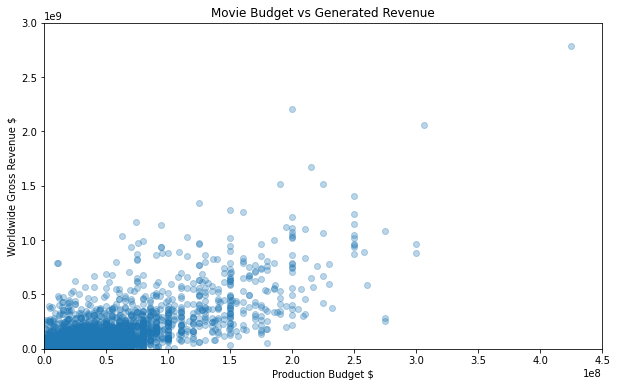

In [5]:
plt.figure(figsize=(10,6))
plt.title('Movie Budget vs Generated Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross Revenue $')
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)

# plot the training data
plt.scatter(X, y, alpha=0.3)

plt.show()

## Explanation of Machine Learning Algorithm

We will now use the ML algorithm Linear Regression. 
Regression is a statistical method to determine the strength/character of the relationship between dependent variable and independent variables. Linear Regression aims to quantify the relationship between X and y (budget and revenue, feature and target) as a straight line.   
y = mx + c   
==> hθ(x) = θ0 + θ1x  
We don't really know the parameters θ0 θ1, they need to be estimated.

How do we know where to draw the line in this data points? We can draw many lines, which line has the most accurate θ0 θ1 estimate?
In real data, there is always a gap between drawn fitted value/predicted value and actual data point => called Residual.

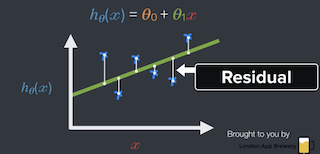

Draw a line with least residuals (square them to remove negatives) ==> Most fitted ==> best prediction.   
Therefore, the goal of Linear Regression is to calculate the line that minimizes these residuals.

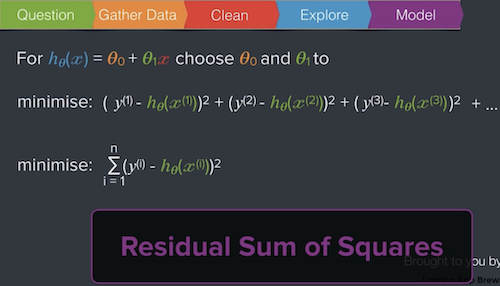


In [6]:
# run a regression to train the model with existing X and y data
regression = LinearRegression()
regression.fit(X, y)

intercept = regression.intercept_
slope = regression.coef_
print(f'Intercept = {intercept} : Type: {type(intercept)}\nSlope = {slope} : Type: {type(slope)}')

# predicted y value with the least residuals, for each of the X values
estimated_revenue = regression.predict(X)
# print(estimated_revenue)

# goodness of fit of the model
score = regression.score(X, y)
print(f'R² = {score}')

Intercept = [-7236192.72913958] : Type: <class 'numpy.ndarray'>
Slope = [[3.11150918]] : Type: <class 'numpy.ndarray'>
R² = 0.5496485356985729


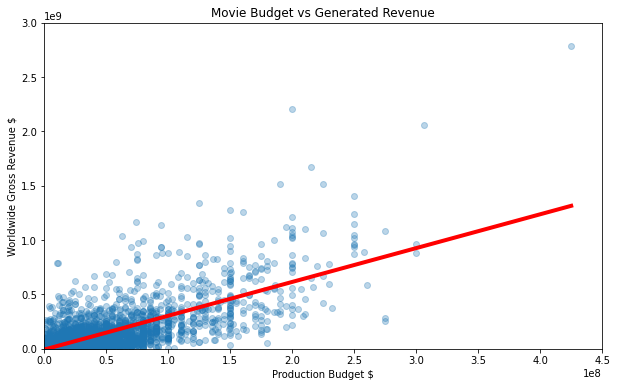

In [7]:
plt.figure(figsize=(10,6))
plt.title('Movie Budget vs Generated Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross Revenue $')
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)

plt.scatter(X, y, alpha=0.3)
# plot the regresssion line with the predicted values
plt.plot(X, estimated_revenue, color='red', linewidth=4)

plt.show()

## Evaluation of the model  
How did we do? What can movie budgets tell about revenue? Think about the model.  


### Are the theta values plausible?   
**SLOPE**: change in y for a given change in X  
Eg: Slope = [[3.11150918]]  
==> For every 1USD production budget, we make slope times as much revenue. Positive implies gain money. Negative implies lose money.  
==> In this case, positive relationship between budget and revenue. For every dollar spent on budget, we make 3 times as much revenue.  

**INTERCEPT**: where the line intersects y-axis ==> y value when x=0   
Eg: Intercept = [-7236192.72913958]    
==> A movie with a budget of 0USD would make this much money.
==> In this case, we lose 7.2million if we put 0USD. 

**Therefore, this model is a dramatic simplification of the real world. We cannot trust much at the extreme ends.**



### How accurate is the model?
So, if we wanted to predict the revenue of a movie with 2million budget, we would just need to substitute the slope and intercept values in the  equation.  
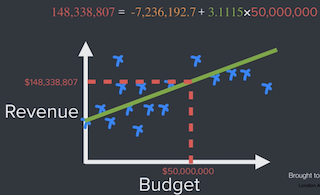  

How do we know if it is accurate? How good is our model? We need a measure.  
==> Goodness of Fit  
==> R² or r²  
==> Proportion of the variation in y that is predictable from X.
==> Amount of the variation in movie revenue that is explained by movie budget.
Eg: R² = 0.54 = 55%

**Our model with a single feature(budget) can explain 55% of the variation in the revenue.**



What if more features such as movie shoot duration, whether a movie is a sequel or not. Would our model be better and would predictions be more accurate?
Maybe we should evaluate the model based on not just the data we used to train it, but on data it hasn't seen yet?
What if relationship is non-linear and we had to do some transformations on the data to get a better fit?
